<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Week-2-Part-2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Rain prediction data)

The dataset consists of various factors like temperature, humidity, a wind speed that are important in predicting the rainfall in the Indian subcontinent. 

**Temperature_min**: Minimum temperature for the day

**Temperature_max**: Maximum temperature for the day

**WindSpeedAt3am**: Today's speed of the wind at 3 am 

**WindSpeedAt10am**: Today's speed of the wind at 10 am

**WindSpeedAt6pm**: Today's speed of the wind at 6 pm 

**HumidityLevelAt10am**: Today's humidity level at 10 am

**HumidityAt6pm**: Today's humidity level at 6 pm

**PressureAt10am**: Today's atmospheric pressure at 10 am

**PressureAt6pm**: Today's atmospheric pressure at 6 pm

**TemperatureAt10am**: Today's temperature at 10 am

**TemperatureAt6pm**: Today's temperature at 6 pm

**WillRainTomorrow?**: Will there be rain tomorrow? (Yes or No) (target/dependent variable)

Use different dimension reduction techniques to transform the dataset into the lower dimension.

## Table of Content

1. **[Exploratory Data Analysis](#eda)**
2. **[Principal Component Analysis (PCA)](#pca)**


**Import the required libraries**

In [1]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# import seaborn library for an advance visualization
import seaborn as sns

# train test split
from sklearn.model_selection import train_test_split

# 'StandardScalar' from sklearn.preprocessing library is used to scale the data
from sklearn.preprocessing import StandardScaler

# 'eig' from numpy.linalg to calculate eigenvalues and eigenvectors
from numpy.linalg import eig

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

# 'LDA' function to perform linear discriminant analysis using the sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# import decision tree classifier and random forest classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

#### Load the csv file

In [3]:
# load the csv file
df_rain = pd.read_csv('Ind_Climate_RainPred.csv')

# display the first five observations
df_rain.head()

,Temperature_min,Temperature_max,WindSpeedAt3am,WindSpeedAt10am,WindSpeedAt6pm,HumidityLevelAt10am,HumidityAt6pm,PressureAt10am,PressureAt6pm,TemperatureAt10am,TemperatureAt6pm,WillRainTomorrow?
0,20.3,30.7,32,6,17,110,72,1025.2,1015.4,26.6,40.4,No
1,30.0,33.3,33,10,20,70,35,1032.6,1035.4,26.6,39.3,No
2,23.5,26.9,24,14,20,98,63,1025.5,1026.0,29.8,34.6,Yes
3,25.5,26.9,45,20,30,82,59,1019.3,1016.9,24.2,30.8,No
4,33.5,39.3,33,4,12,94,49,1027.3,1022.2,33.6,43.6,No



### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Exploratory Data Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Check the datatype of all the variables in the dataset. If the datatype is not as per the definition, do the needful.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# check datatype of each variable
df_rain.dtypes

Temperature_min        float64
Temperature_max        float64
WindSpeedAt3am           int64
WindSpeedAt10am          int64
WindSpeedAt6pm           int64
HumidityLevelAt10am      int64
HumidityAt6pm            int64
PressureAt10am         float64
PressureAt6pm          float64
TemperatureAt10am      float64
TemperatureAt6pm       float64
WillRainTomorrow?       object
dtype: object

**Interpretation:** The above output shows that all the independent variables are numerical and the target variable is categorical, which is correct as per the data definition. Thus there is no need to change the datatype of any variable.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Check the statistical summary of all the numerical variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
# check the statistical summary of numerical variables
# by default, the 'describe()' returns the summary of numerical variables 
df_rain.describe()

,Temperature_min,Temperature_max,WindSpeedAt3am,WindSpeedAt10am,WindSpeedAt6pm,HumidityLevelAt10am,HumidityAt6pm,PressureAt10am,PressureAt6pm,TemperatureAt10am,TemperatureAt6pm
count,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000,10464.000000
mean,26.308964,30.309939,41.391820,15.379683,20.394209,82.210627,60.992928,1023.362481,1020.702332,30.713083,36.218626
std,6.843041,7.424327,14.437279,7.449217,7.847386,18.557838,22.737736,7.536385,7.433202,6.752840,7.723442
min,7.200000,13.200000,9.000000,2.000000,2.000000,11.000000,4.000000,993.700000,991.900000,10.300000,16.700000
25%,21.300000,24.600000,31.000000,10.000000,15.000000,70.000000,44.000000,1018.400000,1015.600000,25.800000,30.600000
50%,26.200000,29.500000,39.000000,14.000000,20.000000,85.000000,59.000000,1023.400000,1020.700000,30.800000,35.600000
75%,31.500000,35.600000,49.000000,20.000000,25.000000,98.000000,77.000000,1028.600000,1025.700000,35.400000,41.400000
max,47.300000,55.800000,131.000000,58.000000,63.000000,110.000000,110.000000,1048.900000,1046.400000,56.300000,63.300000


**Interpretation:** The above summary output shows that the average maximum temperature is 30.3 <sup>o</sup>C while the average minimum temperature is 26.3 <sup>o</sup>C. On average the wind speed is highest at 3 am and there is most humid at 10 am. The average pressure is almost the same for the whole day. On average the temperature is more at 6 pm than at 10 am.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Is the target variable highly imbalanced? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# check the number of observations in each class of the target variable
# the 'value_counts()' returns the number of observations in each class
df_rain['WillRainTomorrow?'].value_counts()

No     5464
Yes    5000
Name: WillRainTomorrow?, dtype: int64

**Interpretation:** The above output shows that there are two unique classes in the target variable. Among these classes, class `No` is most frequent with 5464 records and the other class has 5000 observations. Thus we can say that the target variable is not highly imbalanced.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Check if any missing values are present in the data. If yes, do the needful.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_rain.isnull().sum().sort_values(ascending=False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_rain.isnull().sum()*100/df_rain.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
WillRainTomorrow?,0,0.0
TemperatureAt6pm,0,0.0
TemperatureAt10am,0,0.0
PressureAt6pm,0,0.0
PressureAt10am,0,0.0
HumidityAt6pm,0,0.0
HumidityLevelAt10am,0,0.0
WindSpeedAt6pm,0,0.0
WindSpeedAt10am,0,0.0
WindSpeedAt3am,0,0.0


**Interpretation:** The above output shows that there are no missing values present in the data.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the distribution of all the independent variables and identify the type of skewness.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

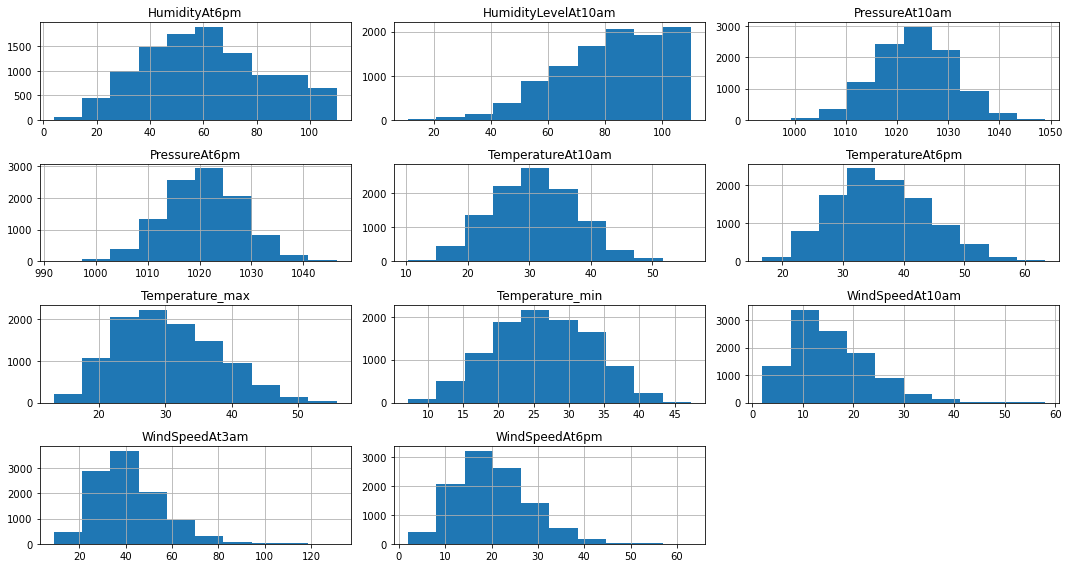

In [8]:
# for the independent variables, we plot the histogram to check the distribution of the variables
# the 'hist()' considers the numeric variables and returns the histogram of each variable
df_rain.hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

**Interpretation:** The above plot shows that the variable `HumidityLevelAt10am` is negatively skewed. 

The variables `HumidityAt6pm`, `TemperatureAt6pm`, `Temperature_max`, `WindSpeedAt3am`, `WindSpeedAt10am`, and `WindSpeedAt6pm` are positively skewed. 

And the variables `PressureAt10am`, `PressureAt6pm`, `TemperatureAt10am`, and `Temperature_min` are near normally distributed.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Transform the independent variables such that each variable will have a mean zero and standard deviation of 1.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# perform standardization on the independent variables
# fit_transform() transforms the data by first computing the mean and sd and later scaling the data
# use 'drop()' to drop the target variable
# 'axis = 1' removes the secified column
rain_std = StandardScaler().fit_transform(df_rain.drop('WillRainTomorrow?', axis = 1))

# create a dataframe of scaled data
df_rain_std = pd.DataFrame(rain_std, columns = df_rain.drop('WillRainTomorrow?', axis = 1).columns)

# check the mean and standard deviation of each variable
# use 'round()' to get the integer output
print('Mean: \n', round(df_rain_std.mean()))

# print a blank line
print('\n')

print('Standard Deviation: \n', round(df_rain_std.std()))

Mean: 
 Temperature_min       -0.0
Temperature_max       -0.0
WindSpeedAt3am         0.0
WindSpeedAt10am        0.0
WindSpeedAt6pm        -0.0
HumidityLevelAt10am   -0.0
HumidityAt6pm         -0.0
PressureAt10am         0.0
PressureAt6pm          0.0
TemperatureAt10am     -0.0
TemperatureAt6pm      -0.0
dtype: float64


Standard Deviation: 
 Temperature_min        1.0
Temperature_max        1.0
WindSpeedAt3am         1.0
WindSpeedAt10am        1.0
WindSpeedAt6pm         1.0
HumidityLevelAt10am    1.0
HumidityAt6pm          1.0
PressureAt10am         1.0
PressureAt6pm          1.0
TemperatureAt10am      1.0
TemperatureAt6pm       1.0
dtype: float64


**Interpretation:** The above output shows that all the variables have mean = 0 and standard deviation = 1. Thus we have standardized the independent variables.

<a id="pca"> </a>
## 2. Principal Component Analysis (PCA)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Find the covariance matrix of the standardized data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
# generate the covariance matrix using 'cov' function
# pass the transpose of the standardized data to calculate the covariance between the variables (columns)
# by default, the 'cov()' returns the covariance between the observations (rows)
covariance_mat = np.cov(df_rain_std.T)

# print the first five elements of the matrix
covariance_mat[0:5]

array([[ 1.00009557,  0.62986804,  0.2774717 ,  0.19188583,  0.10114221,
        -0.25035675, -0.05795163, -0.3635111 , -0.34036162,  0.71612149,
         0.54811355],
       [ 0.62986804,  1.00009557,  0.23626203, -0.01431146,  0.07161277,
        -0.50728072, -0.55772371, -0.24497184, -0.29854472,  0.76966307,
         0.8658169 ],
       [ 0.2774717 ,  0.23626203,  1.00009557,  0.42037333,  0.57176138,
        -0.27611053, -0.11724591, -0.47841125, -0.47563157,  0.27207988,
         0.17209019],
       [ 0.19188583, -0.01431146,  0.42037333,  1.00009557,  0.33458778,
        -0.31749763, -0.00663469, -0.25165481, -0.18433562,  0.14168084,
        -0.0391036 ],
       [ 0.10114221,  0.07161277,  0.57176138,  0.33458778,  1.00009557,
        -0.19684857, -0.15049059, -0.33940416, -0.30875067,  0.10542863,
         0.04909065]])

In [11]:
# check the shape of the covariance matrix
covariance_mat.shape

(11, 11)

**Interpretation:** Here we obtained a square covariance matrix of dimension 11x11. The diagonal values represent the variance of each variable and the off-diagonal entries represent the covariance between the variables.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Compute the eigenvalues and eigenvectors of the above covariance matrix.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# use 'eig()' function to compute eigenvalues and eigenvectors of the covariance matrix
eigenvalue, eigenvector = np.linalg.eig(covariance_mat)

# print the eigenvalues
print('Eigenvalues: \n',eigenvalue,"\n")

# print the eigenvectors
print('Eigenvectors: \n',eigenvector,'\n')

Eigenvalues: 
 [4.37827342 2.20537611 1.4028951  0.93909121 0.69185977 0.38762838
 0.34242384 0.24329175 0.11262274 0.13748201 0.160107  ] 

Eigenvectors: 
 [[-0.33781785 -0.03549082 -0.35858565  0.42444298 -0.13644818 -0.14320347
   0.03924682 -0.7102148  -0.1131725  -0.11587593 -0.06766114]
 [-0.40087506 -0.28485778 -0.10425574 -0.03376955 -0.1189962   0.08118397
  -0.15405941  0.11028839  0.82752819 -0.0604924   0.03216514]
 [-0.26666777  0.38120744  0.1908883   0.02705605 -0.31592881  0.78707893
   0.12571969 -0.05588588 -0.05942134  0.04255307 -0.05314346]
 [-0.14561644  0.32320401  0.33544556  0.59156622  0.38842204 -0.06004674
  -0.47855507  0.14902074  0.05799504 -0.04274979 -0.03114975]
 [-0.17812567  0.3671682   0.34917199 -0.09189247 -0.61597616 -0.55598391
   0.01913024  0.05338958  0.03795733 -0.01323056  0.09857223]
 [ 0.3093895   0.14948994 -0.44585592 -0.03061406 -0.38031984  0.06731708
  -0.58995926  0.13531557 -0.03534899 -0.07698165 -0.39936631]
 [ 0.24976325  0.3089

**Interpretation:** The above output represents the 11 eigenvalues and their corresponding eigenvectors. The k<sup>th</sup> column of the array of eigenvectors represents the eigenvector corresponding to the k<sup>th</sup> eigenvalue.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Use the Kaiser criterion to identify the optimal number of principal components.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

The Kaiser criterion considers the optimal number of components for which the eigenvalue is greater than 1. Let us arrange the eigenvalues in descending order.

In [13]:
# Q8 computes the eigenvalues of the covariance matrix and it is stored in the array 'eigenvalue'
# convert the array into the list
list_eigenvalue = eigenvalue.tolist()

# sort the list of eigenvalues in descending order
# use 'reverse = True' to sort the values in descending order
# by default, the 'sort()' arrange the values in ascending order
list_eigenvalue.sort(reverse = True)

# print the sorted eigenvalues
print(list_eigenvalue)

[4.37827342476177, 2.2053761142853308, 1.4028950957281123, 0.9390912080234745, 0.6918597738714418, 0.387628379944504, 0.34242383692492667, 0.24329174527626746, 0.16010699746005702, 0.13748200581003228, 0.11262274162621116]


**Interpretation:** The arranged list of eigenvalues shows that the first three eigenvalues are greater than 1. Thus by the Kaiser criterion, we can consider the optimal number of principal components as 3. The eigenvalues less than 1 do not explain much of the variance in the data.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. How many minimum principal components are required to explain at least 80% of the variation in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Let us calculate the percentage of variation explained by each principal component.

The proportion of variation explained by i<sup>th</sup> principal component is calculated by taking the ratio of i<sup>th</sup> eigenvalue to the sum of all the eigenvalues. To calculate the percentage, multiply this ratio by 100.

In [14]:
# calculate the percentage of variation explained by each principal component
# create an empty list to store the percentage of variation explained by each principal component
percent_var = []

# use a 'for' loop to calculate the percentage of variation for each component
for i in list_eigenvalue:
    variation = i/sum(list_eigenvalue)*100
    
    # add the values to the list 'percent_var'
    percent_var.append(variation)
    
# print the percentage of variation
percent_var

[39.79868192528705,
 20.046957780587487,
 12.752372972792642,
 8.536376936987086,
 6.289033234307147,
 3.5235575995268156,
 3.112646481221772,
 2.2115317719849763,
 1.4553790610444268,
 1.249716974901279,
 1.0237452613593339]

**Interpretation:** The above list represents the percentage of variation explained by each component. We can conclude that the first four components explain approximately 81% of the variation in the data. Thus, we need minimum `4` principal components to explain at least 80% of the variation in the data.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Create a dataframe of the transformed data with 4 principal components.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# consider the eigenvectors corresponding to the 1st 4 highest eigenvalues
# the columns of the array 'eigenvector' in the Q8 represent the eigenvectors
eig_vec_4 = eigenvector[:,0:4]

# reduce the dimension of the original dataset by taking the dot product of scaled data and 4 eigenvectors
new_data = np.dot(df_rain_std, eig_vec_4)

# create the dataframe using the 'DataFrame()'
# pass the required column names to the parameter 'columns'
df_pca = pd.DataFrame(new_data, columns = ['PC1', 'PC2', 'PC3', 'PC4'])

# head() to display top five rows
df_pca.head()

,PC1,PC2,PC3,PC4
0,1.193577,-0.344281,-1.318532,-1.383219
1,0.417268,-2.300435,1.143463,0.313206
2,1.374390,-0.522208,-0.229444,0.056650
3,0.166105,1.620767,0.794714,-0.358037
4,-0.528825,-2.208708,-1.513146,-0.370726


In [16]:
# check the dimension of the transformed data
df_pca.shape

(10464, 4)

**Interpretation:** We have obtained the new dataset with only 4 dimensions. Thus we have reduced the number of variables from 11 to 4.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Visualize the rain prediction data by transforming it to 2-dimensions using the python library. Also, display the classes of the target variables with different colors.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Let us use the `PCA()` from sklearn library to obtain 2 principal components.

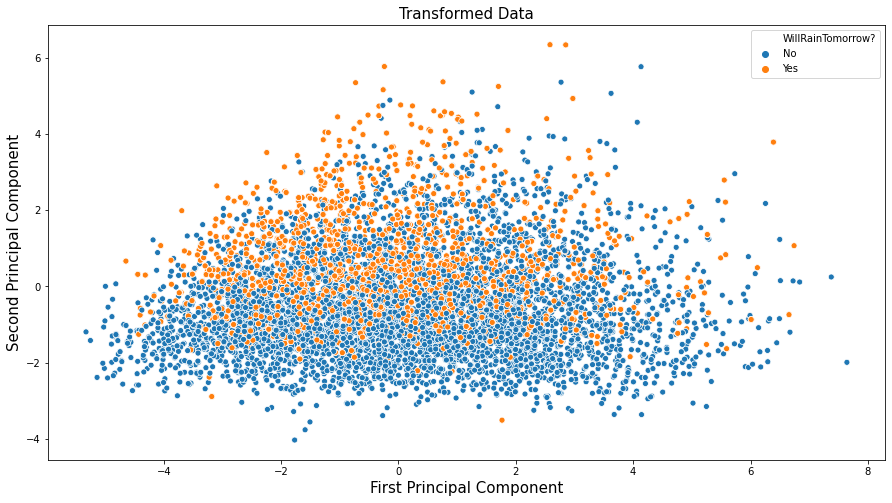

In [17]:
# use the 'PCA()' from the sklearn library to reduce the number of features 
# specify required no of components to 'n_components'
# pass the 'random_state' to produce the same results for each code run
pca = PCA(n_components = 2, random_state = 10)  

# fit the PCA and transform the standardized data
pca_2 = pca.fit_transform(df_rain_std)

# create the dataframe using the 'DataFrame()'
# pass the required column names to the parameter 'columns'
df_pca_2 = pd.DataFrame(pca_2, columns = ['PC1', 'PC2'])

# plot a scatterplot to visualize the dataset
# pass the variables on x and y axes to the parameter 'x' and 'y' respectively
# pass the dataframe to the parameter 'data'
# pass the target variable to the parameter 'hue' to display the classes of the target variables with different colors
sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca_2, hue = df_rain['WillRainTomorrow?'])

# set the plot title and axes labels
# set the text size using 'fontsize'
plt.title('Transformed Data', fontsize = 15)
plt.xlabel('First Principal Component', fontsize = 15)
plt.ylabel('Second Principal Component', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** The above plot shows the maximum variation in the data along the first principal component.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Split the dataset of the 11 standardized features into the train and test sets of proportion 70:30.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

We have the standardized features in the dataframe `df_rain_std`. 

In [18]:
# consider the target variable
y = df_rain['WillRainTomorrow?']

# split the dataset with standardized features into train and test set
# pass the independent and dependent variables
# pass the required proportion of the test set to the parameter 'test_size'
# pass the 'random_state' to obtain the same sets for multiple code runs
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df_rain_std, y, test_size = 0.3, random_state = 10)

# check the shape of the train and test sets
print('X_train_raw:', X_train_raw.shape)
print('y_train:', y_train.shape)
print('X_test_raw:', X_test_raw.shape)
print('y_test:', y_test.shape)

X_train_raw: (7324, 11)
y_train: (7324,)
X_test_raw: (3140, 11)
y_test: (3140,)


**Interpretation:** Here we split our original dataset into train and test sets. The train set consists of 70% of the total observations and the test set contains the remaining 30% of observations.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Reduce the number of features in the train and test sets to 3 using the python library.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# use the 'PCA()' from the sklearn library to reduce the number of features 
# specify required no of components to 'n_components'
# pass the 'random_state' to produce the same results for each code run
pca = PCA(n_components = 3, random_state = 10)  

# fit the PCA on train data and transform the train and test sets
# the 'fit_transform()' fits the PCA on the data and performs dimension reduction
X_train_pca = pca.fit_transform(X_train_raw)
X_test_pca = pca.transform(X_test_raw)

# check the dimension of the transformed data
print('Train set:', X_train_pca.shape)
print('Test set:', X_test_pca.shape)

Train set: (7324, 3)
Test set: (3140, 3)


**Interpretation:** The above output shows that the number of features is reduced from 11 to 3.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Write a generalized function that builds the random forest classification algorithm and returns the accuracy of the algorithm on the test set.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# define a function to perform random forest algorithm and return the accuracy on the test set
# pass the train and test sets as the function parameters
def randomforest_model_run(X_train, X_test, y_train, y_test):
    
    # create a random forest classifier object
    # pass the random state to obtain the reproducible results
    rf_clf = RandomForestClassifier(random_state=1)
    
    # fit the random forest model on the train data
    rf_clf.fit(X_train, y_train)
    
    # predict the output values for test set
    y_pred = rf_clf.predict(X_test)
    
    # calculate accuracy for test set
    test_acc = accuracy_score(y_test, y_pred)
    
    # return the test accuracy 
    return print('Test Accuracy:', test_acc)

**Interpretation:** The code returns the accuracy of the random forest classifier for the test set given the train and test sets as input parameters.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Build a random forest model on the original data (without PCA transformation) and find the accuracy of the model on the test data. Also, calculate the time required to execute the code.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

We use the function defined in the previous question to build the random forest model. 

In [21]:
%%time
# '%%time' records the time required to execute the code

# pass the train and test set of the untransformed data
randomforest_model_run(X_train_raw, X_test_raw, y_train, y_test)

Test Accuracy: 0.9372611464968152
Wall time: 973 ms


**Interpretation:** The output shows that the random forest classifier builds on the untransformed data (i.e. data with 11 variables) is 93.73% accurate on the test set.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Build a random forest model on the dataset transformed using PCA and find the accuracy of the model on the test data. Also, calculate the time required to execute the code.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

We use the function defined in Q15 to build the random forest model. 

In [22]:
%%time
# '%%time' records the time required to execute the code

# pass the train and test set of the PCA-transformed data
# we have transformed the dataset using PCA in Q14
randomforest_model_run(X_train_pca, X_test_pca, y_train, y_test)

Test Accuracy: 0.9171974522292994
Wall time: 654 ms


**Interpretation:** The output shows that the random forest classifier builds on the dataset transformed using PCA (i.e. data with 3 principal components) is 91.72% accurate on the test set. But we can notice that the time required to execute the code is less for PCA transformed data.